In [91]:
from collections import Counter
import pandas as pd

In [92]:
import warnings
warnings.filterwarnings('ignore')

In [93]:
path = './competition/'
train = pd.read_csv(path + 'train.csv')
test = pd.read_csv(path + 'test.csv')

In [94]:
from sklearn.metrics import mean_squared_error as MSE

In [95]:
train

,dateid,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
0,2014-04-01,125.0,Tue,1,メンチカツ,377.0,NaN,NaN,NaN,晴時々薄曇,0.0,13.9
1,2014-04-02,99.0,Wed,0,肉じゃが,380.0,NaN,NaN,NaN,薄曇一時晴,0.0,15.2
2,2014-04-03,100.0,Thu,1,酢豚,390.0,NaN,NaN,NaN,大雨,65.0,13.8
3,2014-04-04,90.0,Fri,1,和風ソースハンバーグ,350.0,NaN,NaN,NaN,晴時々曇一時雨、雷を伴う,40.0,15.3
4,2014-04-07,107.0,Mon,0,青梗菜牛肉炒め,387.0,NaN,NaN,NaN,晴後一時薄曇,0.0,11.4
...,...,...,...,...,...,...,...,...,...,...,...,...
332,2015-08-21,137.0,Fri,0,チキンカレー,NaN,お楽しみメニュー,NaN,NaN,曇後一時雨,2.5,26.0
333,2015-09-01,80.0,Tue,1,自家製手作りトンカツ,423.0,弁当種類増↓,NaN,NaN,雨後曇、雷を伴う,12.0,23.7
334,2015-09-02,74.0,Wed,0,チーズメンチカツ,463.0,NaN,NaN,NaN,曇時々雨後晴,5.5,26.9
335,2015-09-03,66.0,Thu,1,鶏肉黒胡椒焼きおろしソース,420.0,NaN,NaN,NaN,曇後一時雨,1.5,25.7


In [96]:
train.shape

(337, 12)

In [97]:
test.shape

(144, 11)

In [98]:
combined = train.append(test, ignore_index=True)
combined

,dateid,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
0,2014-04-01,125.0,Tue,1,メンチカツ,377.0,NaN,NaN,NaN,晴時々薄曇,0.0,13.9
1,2014-04-02,99.0,Wed,0,肉じゃが,380.0,NaN,NaN,NaN,薄曇一時晴,0.0,15.2
2,2014-04-03,100.0,Thu,1,酢豚,390.0,NaN,NaN,NaN,大雨,65.0,13.8
3,2014-04-04,90.0,Fri,1,和風ソースハンバーグ,350.0,NaN,NaN,NaN,晴時々曇一時雨、雷を伴う,40.0,15.3
4,2014-04-07,107.0,Mon,0,青梗菜牛肉炒め,387.0,NaN,NaN,NaN,晴後一時薄曇,0.0,11.4
...,...,...,...,...,...,...,...,...,...,...,...,...
476,2016-05-19,NaN,Thu,1,豚肉ザーサイ豆腐,490.0,NaN,NaN,NaN,晴後薄曇,0.0,19.3
477,2016-05-20,NaN,Fri,1,キーマカレー,485.0,NaN,ママの会,NaN,曇,0.0,17.2
478,2016-05-23,NaN,Mon,0,鶏肉の照り焼き,505.0,NaN,NaN,NaN,薄曇後時々晴,0.0,23.5
479,2016-05-24,NaN,Tue,1,海鮮チリソース,485.0,NaN,NaN,NaN,薄曇一時晴,0.0,23.4


In [99]:
combined.isnull().sum()

dateid             0
y                144
week               0
soldout            0
name               0
kcal              49
remarks          416
event            439
payday           456
weather            0
precipitation      0
temperature        0
dtype: int64

In [100]:
combined['kcal'] = combined['kcal'].fillna(combined['kcal'].mean())

In [101]:
combined[['remarks','event','payday']] = combined[['remarks','event','payday']].fillna(0)

### One-hot-エンコーディング

In [102]:
one_hot = pd.get_dummies(combined[['name','remarks','event','payday','weather','week']])

In [103]:
combined

,dateid,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
0,2014-04-01,125.0,Tue,1,メンチカツ,377.0,0,0,0.0,晴時々薄曇,0.0,13.9
1,2014-04-02,99.0,Wed,0,肉じゃが,380.0,0,0,0.0,薄曇一時晴,0.0,15.2
2,2014-04-03,100.0,Thu,1,酢豚,390.0,0,0,0.0,大雨,65.0,13.8
3,2014-04-04,90.0,Fri,1,和風ソースハンバーグ,350.0,0,0,0.0,晴時々曇一時雨、雷を伴う,40.0,15.3
4,2014-04-07,107.0,Mon,0,青梗菜牛肉炒め,387.0,0,0,0.0,晴後一時薄曇,0.0,11.4
...,...,...,...,...,...,...,...,...,...,...,...,...
476,2016-05-19,NaN,Thu,1,豚肉ザーサイ豆腐,490.0,0,0,0.0,晴後薄曇,0.0,19.3
477,2016-05-20,NaN,Fri,1,キーマカレー,485.0,0,ママの会,0.0,曇,0.0,17.2
478,2016-05-23,NaN,Mon,0,鶏肉の照り焼き,505.0,0,0,0.0,薄曇後時々晴,0.0,23.5
479,2016-05-24,NaN,Tue,1,海鮮チリソース,485.0,0,0,0.0,薄曇一時晴,0.0,23.4


### inplace = True にすると，元のDataFrameが変更される

#### ５項目消去する

In [104]:
combined.drop(['name','remarks','event','payday','weather','week'], axis=1, inplace=True)

In [105]:
from sklearn.preprocessing import LabelEncoder

#le = LabelEncoder()
#encoded = le.fit_transform(combined['week'].values)
#decoded = le.inverse_transform(encoded)
#combined['week'] = encoded

In [106]:
combined

,dateid,y,soldout,kcal,precipitation,temperature
0,2014-04-01,125.0,1,377.0,0.0,13.9
1,2014-04-02,99.0,0,380.0,0.0,15.2
2,2014-04-03,100.0,1,390.0,65.0,13.8
3,2014-04-04,90.0,1,350.0,40.0,15.3
4,2014-04-07,107.0,0,387.0,0.0,11.4
...,...,...,...,...,...,...
476,2016-05-19,NaN,1,490.0,0.0,19.3
477,2016-05-20,NaN,1,485.0,0.0,17.2
478,2016-05-23,NaN,0,505.0,0.0,23.5
479,2016-05-24,NaN,1,485.0,0.0,23.4


### join = "outer" ですべての要素を残す

In [107]:
df_concat = pd.concat([combined, one_hot], axis=1, join='outer')

In [108]:
df_concat

,dateid,y,soldout,kcal,precipitation,temperature,payday,name_3種のきのこグラタンコロッケ,name_BBQチキン,name_いか天ぷら,...,weather_雨後曇、雷を伴う,weather_雨後曇一時晴,weather_雨時々みぞれ,weather_雨時々曇,weather_雨時々曇一時雪,week_Fri,week_Mon,week_Thu,week_Tue,week_Wed
0,2014-04-01,125.0,1,377.0,0.0,13.9,0.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2014-04-02,99.0,0,380.0,0.0,15.2,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2014-04-03,100.0,1,390.0,65.0,13.8,0.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2014-04-04,90.0,1,350.0,40.0,15.3,0.0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,2014-04-07,107.0,0,387.0,0.0,11.4,0.0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,2016-05-19,NaN,1,490.0,0.0,19.3,0.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
477,2016-05-20,NaN,1,485.0,0.0,17.2,0.0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
478,2016-05-23,NaN,0,505.0,0.0,23.5,0.0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
479,2016-05-24,NaN,1,485.0,0.0,23.4,0.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [109]:
df_concat.drop(['dateid'], axis=1, inplace=True)

In [110]:
df_concat

,y,soldout,kcal,precipitation,temperature,payday,name_3種のきのこグラタンコロッケ,name_BBQチキン,name_いか天ぷら,name_えびフライ,...,weather_雨後曇、雷を伴う,weather_雨後曇一時晴,weather_雨時々みぞれ,weather_雨時々曇,weather_雨時々曇一時雪,week_Fri,week_Mon,week_Thu,week_Tue,week_Wed
0,125.0,1,377.0,0.0,13.9,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,99.0,0,380.0,0.0,15.2,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,100.0,1,390.0,65.0,13.8,0.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,90.0,1,350.0,40.0,15.3,0.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,107.0,0,387.0,0.0,11.4,0.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,NaN,1,490.0,0.0,19.3,0.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
477,NaN,1,485.0,0.0,17.2,0.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
478,NaN,0,505.0,0.0,23.5,0.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
479,NaN,1,485.0,0.0,23.4,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [111]:
delimit_num = train.shape[0]
X = df_concat.loc[:delimit_num-1, :].drop(['y'], axis=1)
test = df_concat.loc[delimit_num:, :].drop(['y'], axis=1)
y = train['y']

In [112]:
#X = X.drop(['kcal'], axis = 1)

In [113]:
X.shape

(337, 378)

In [114]:
y.shape

(337,)

In [115]:
test.shape

(144, 378)

In [116]:
from sklearn.model_selection import train_test_split

SEED = 42
X_train, X_test, y_train, y_test = train_test_split(
                                                    X,
                                                    y,  
                                                    test_size=0.2,
                                                    shuffle=False, 
                                                    random_state=SEED
                                                    ) 

<AxesSubplot:title={'center':'Metric during training'}, xlabel='Iterations', ylabel='l2'>

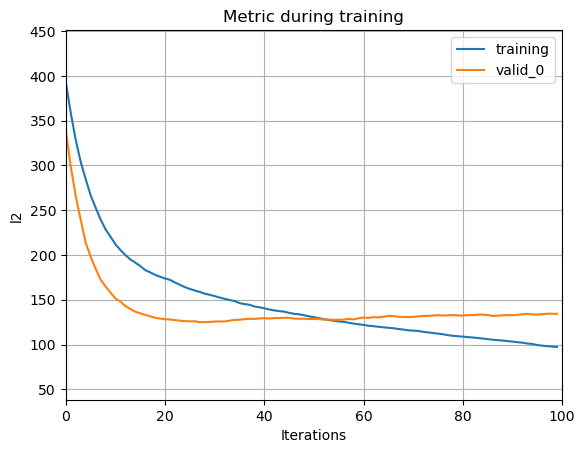

In [117]:
import lightgbm as lgb

SEED = 42

model = lgb.LGBMRegressor(
    random_state = SEED,
)

model.fit(
    X_train, 
    y_train,
    eval_set=[(X_test, y_test), (X_train, y_train)],
    verbose=-1 # 学習ログを省略
)

# 学習履歴の表示
lgb.plot_metric(model)

In [57]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
print("TRAIN:",MSE(y_train, y_train_pred)**0.5, "VARIDATE",MSE(y_test, y_test_pred)**0.5)

TRAIN: 9.937884927802168 VARIDATE 11.976505659271082
